In [2]:
import json
import networkx as nx
import pandas as pd
import numpy as np

In [5]:
with open ('../data/proposals/compound/compound_votes_1_year.json', 'r', encoding='utf8') as file:
    compound_votes = json.load(file)
    
with open ('../data/proposals/compound/compound_proposals_1_year.json', 'r', encoding='utf8') as file:
    compound_proposals = json.load(file)['data']['proposals']

In [11]:
coin_keywords = ['cUSDCv3', 'cUSDTv3', 'cWETHv3']
chain_keywords = ['Arbitrum', 'Base', 'Optimism', 'Polygon', 'Mainnet']

In [ ]:
for proposal in compound_proposals:
    if all(any(word in proposal['title'] for word in words) for words in [coin_keywords, chain_keywords]):
        print(proposal['title'])

In [5]:
G = nx.Graph()

for proposal in compound_proposals:
    G.add_node(proposal['proposer']['id'])
    
    for voting in compound_votes:
        if voting['proposal_id'] == proposal['id']:
            for voter in voting['votes']:
                G.add_node(voter['voter']['id'])
                G.add_edge(proposal['proposer']['id'], voter['voter']['id'])

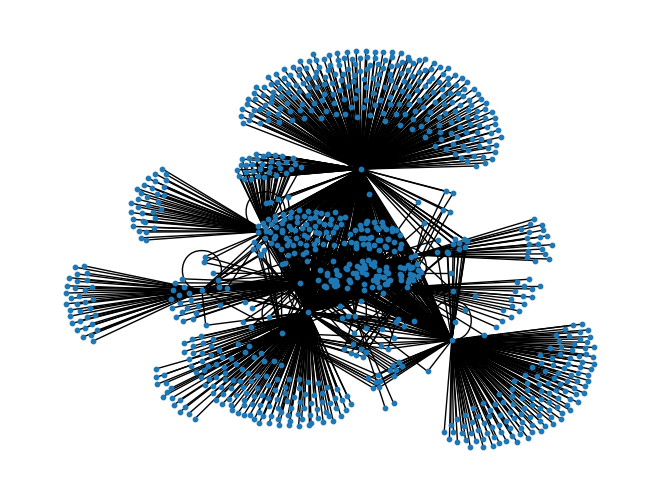

In [4]:
nx.draw(G, node_size=10)

In [6]:
sorted_degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)

In [ ]:
addresses_df = pd.read_csv('../data/1_year/distinct_addresses_1_year.csv')

addresses = addresses_df.values